In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import plotly.tools as tls
import seaborn as sns
import matplotlib.patches as mpatches
import math
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

py.plotly.tools.set_credentials_file(username='mpeyrotc', api_key='pNScWhvJN9woL3frF4Vd')
%matplotlib inline

## Principal Components Selection

In [199]:
R3P = pd.ExcelFile("R3P Q2 Mayo (ADV).xlsx")
R3P_1 = R3P.parse("R3P Q2 Mayo")

R3P_1 = R3P_1.ix[4:,3:31]

R3P_1.columns=['Weekday', 'Time', 'Act. WPs', 'Dia.WPs', 'RFC WPs', 'CPU Usr',
            'CPU Sys', 'CPU Idle', 'Paging in', 'Paging out', 'Free Mem.', 
            'EM alloc.', 'EM attach.', 'Em global', 'Heap Memor', 'Private Modes',
            'Paging Mem', 'Roll Mem', 'Logins', 'Sessions', '# Pasos Dialogo',
            'Resp. Time (Total)', 'CPU (Total)', 'CPU (Prom)', 'BD (Total)', 
            'BD (Prom)', 'Response Time (Prom)', 'Label']

R3P_1.dropna(how="all", inplace=True)
R3P_1['Time'] = R3P_1['Time'].astype(str).apply(lambda x: str(x[0]) + str(x[1]))

X = R3P_1.ix[:,0:-1]
X = X.apply(pd.to_numeric, errors='coerce')

X = X.values

In [200]:
X_std = StandardScaler().fit_transform(X)

In [201]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs[0])
#print('\nEigenvalues \n%s' %eig_vals)
#print('\nCovariance \n%s' %cov_mat[0])

In [30]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])

In [32]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

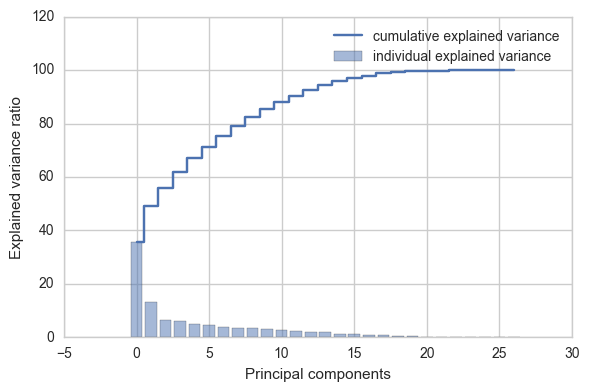

In [198]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## PCA Analysis

In [34]:
PCAs = pd.ExcelFile("PCAs.xlsx")
F1F2 = PCAs.parse("F1F2")

F1F2_X = F1F2.ix[104:130,1:28]

columns = []
for i in xrange(0,27):
    columns.append("F" + str(i + 1))

F1F2_X.columns=columns

F1F2_y = F1F2.ix[104:130,0:1]

### Components F1 and F2

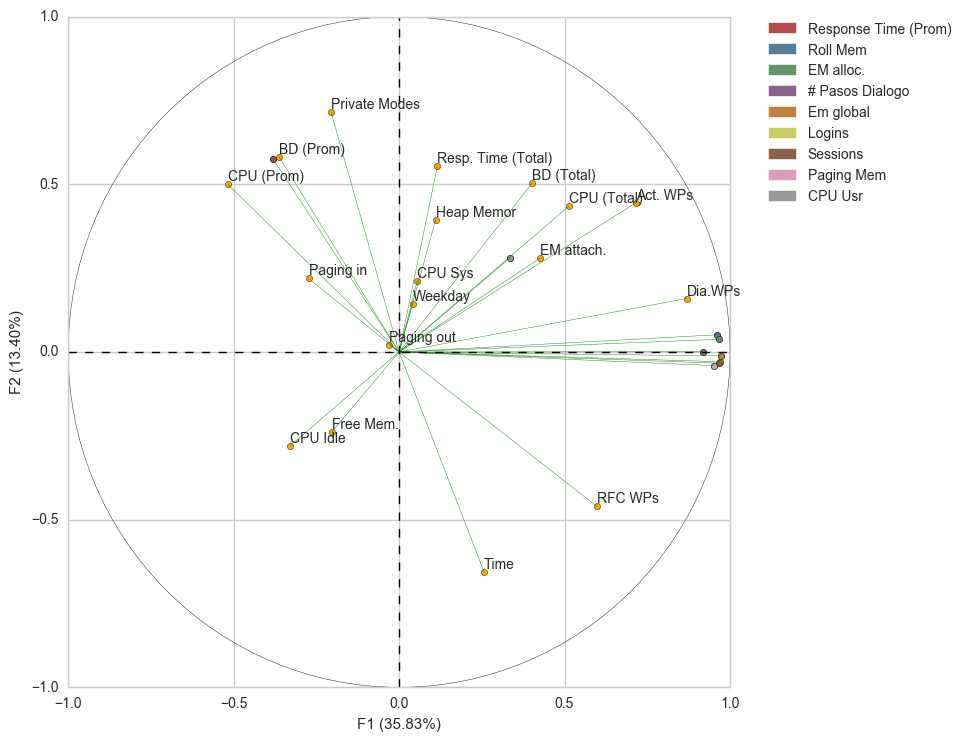

In [35]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    plt.scatter(F1F2_X.T.values[0], F1F2_X.T.values[1], c="Orange")
    plt.ylabel('F2 (13.40%)')
    plt.xlabel('F1 (35.83%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [26, 17, 11, 20, 13, 18, 19, 16, 5]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[0], F1F2_X.T.values[1], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))

    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[0][index], F1F2_X.T.values[1][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)
    
    plt.show()
    
    #mpl_fig1 = plt.gcf()
    #py_fig1 = tls.mpl_to_plotly(mpl_fig1)
    #py.iplot(py_fig1, filename='pcas')
    #tls.embed("https://plot.ly/~mpeyrotc/0") 

### Components F1 and F3

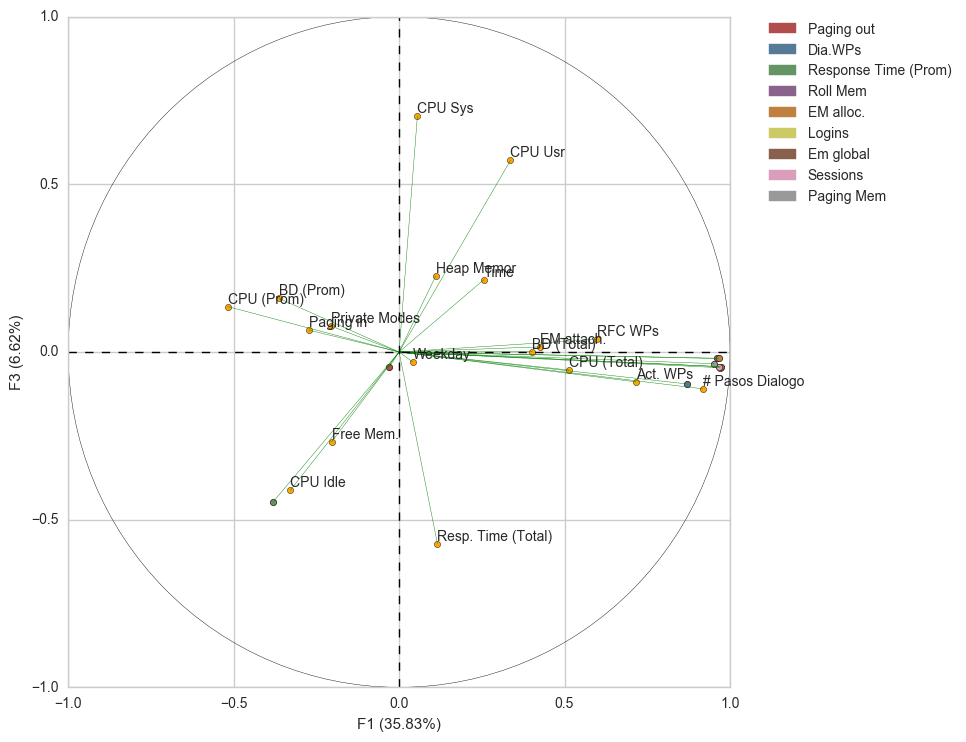

In [36]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    
    plt.scatter(F1F2_X.T.values[0], F1F2_X.T.values[2], c="Orange")
    plt.ylabel('F3 (6.62%)')
    plt.xlabel('F1 (35.83%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [9, 3, 26, 17, 11, 18, 13, 19, 16]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[0], F1F2_X.T.values[2], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))
            
    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[0][index], F1F2_X.T.values[2][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)
    
    plt.show()

### Components F2 and F3

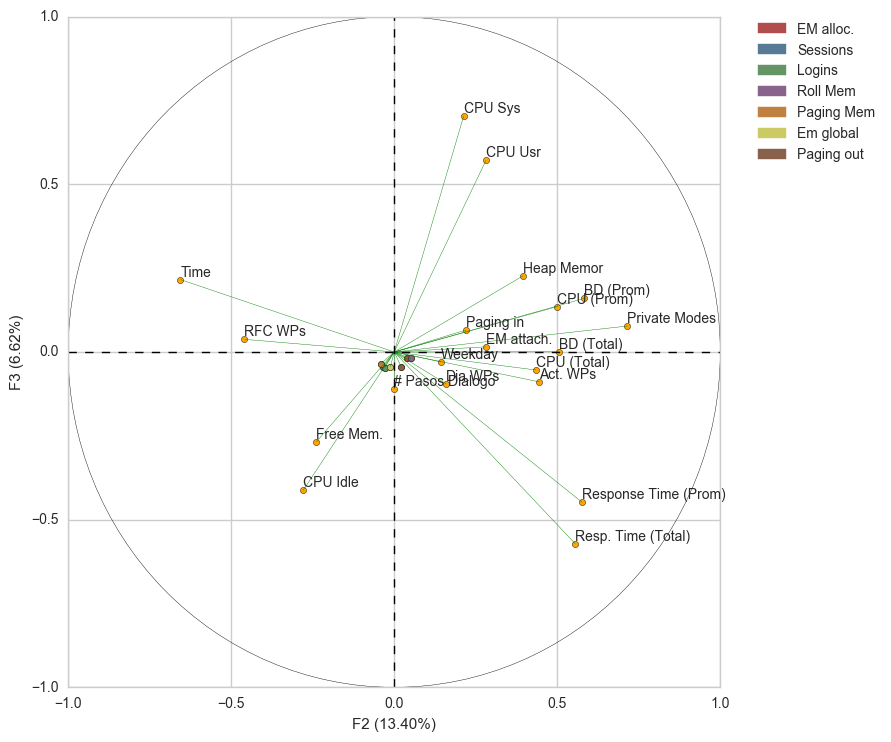

In [37]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    plt.scatter(F1F2_X.T.values[1], F1F2_X.T.values[2], c="Orange")
    plt.ylabel('F3 (6.62%)')
    plt.xlabel('F2 (13.40%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [11, 19, 18, 17, 16, 13, 9]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[1], F1F2_X.T.values[2], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))
            
    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[1][index], F1F2_X.T.values[2][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)

    plt.tight_layout()
    
    plt.show()

## Selecció de variables críticas y reducción de dimensiones

Basado en los resultados eobtenidos en las gráficas anteriores, se determinó que las siguientes variables están correlacionadas a Response Time (promedio) de acuerdo al componente principal F1F2:

1. BD (Prom)
2. CPU(Prom)
3. Private modes
4. RFC WPs
5. Time

De la misma forma, se determinó que por el componente F1 y F3 las siguientes variables también se correlacionan con response time (promedio):

6. CPU Idle
7. CPU Usr

A continuación se muestran las gráficas de comportamiento de cada uno con respecto a response time. Las gráficas naranjas representan una relación visible de relevancia.

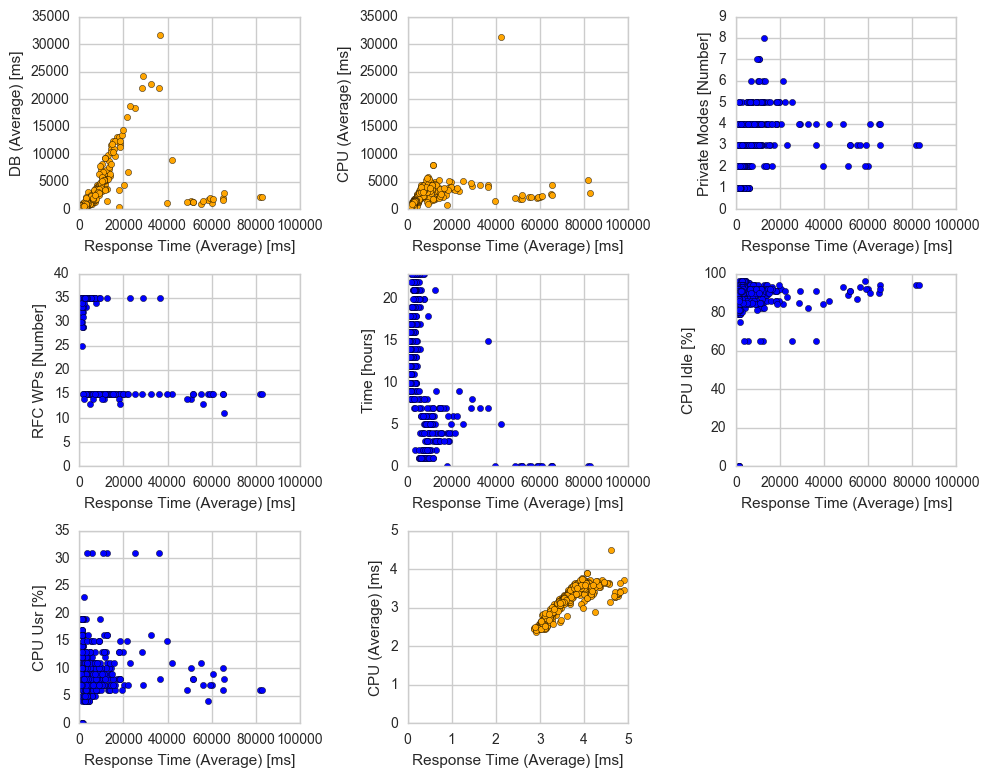

In [195]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(4, 3, 1)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["BD (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('DB (Average) [ms]')
    
    plt.subplot(4, 3, 2)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    
    plt.subplot(4, 3, 3)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,9])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["Private Modes"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('Private Modes [Number]')
    
    plt.subplot(4, 3, 4)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,40])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["RFC WPs"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('RFC WPs [Number]')
    
    plt.subplot(4, 3, 5)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,23])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["Time"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('Time [hours]')
    
    plt.subplot(4, 3, 6)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,100])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU Idle"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU Idle [%]')
    
    plt.subplot(4, 3, 7)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU Usr"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU Usr [%]')
    
    response_time = R3P_1["Response Time (Prom)"].apply(math.log10)
    cpu_prom = R3P_1["CPU (Prom)"].apply(math.log10)
    
    plt.subplot(4, 3, 8)
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    plt.scatter(response_time.T, cpu_prom.T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    
    plt.tight_layout()
    plt.show()

Ya que hemos seleccionado DB (Prom) y CPU(Prom) como variables potenciales para mejorar el rendimiento del sistema, a continueación se proponen funciones matemáticas representativas del comportamiento del sistema.

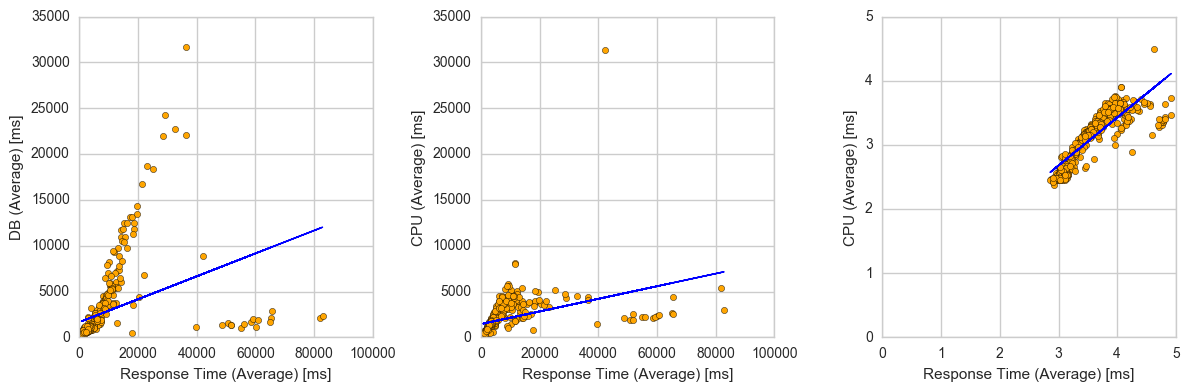

In [247]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 4))
    
    x = R3P_1.loc[:,"Response Time (Prom)"][:, np.newaxis]
    y = R3P_1.loc[:,"BD (Prom)"]
    
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    
    plt.subplot(1, 3, 1)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["BD (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('DB (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)

    x = R3P_1.loc[:,"Response Time (Prom)"][:, np.newaxis]
    y = R3P_1.loc[:,"CPU (Prom)"]

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.subplot(1, 3, 2)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    
    x = response_time[:, np.newaxis]
    y = cpu_prom

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.subplot(1, 3, 3)
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    plt.scatter(response_time.T, cpu_prom.T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    
    plt.tight_layout()
    plt.show()

#### 